<a href="https://colab.research.google.com/github/onishiryo/CFDlecture/blob/main/1d-adv-diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

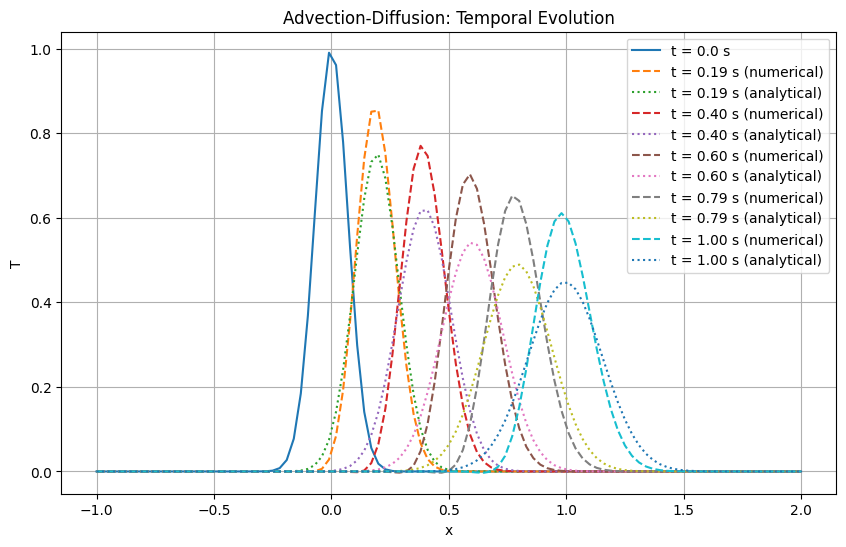

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
xmin = -1.0       # Minimum x
xmax = 2.0        # Maximum x
Nx = 101          # Number of spatial points
nu = 0.01         # Diffusion coefficient [m^2/s]
u = 1.0           # Advection velocity [m/s]
Tmax = 1.0        # Maximum time [s]
dx = (xmax - xmin) / (Nx - 1)  # Grid spacing
CFL = 0.4         # CFL condition (choose <1 for stability)
dt = CFL * dx / u  # Time step size based on advection
Nt = int(Tmax / dt)  # Number of time steps

# Grids
x = np.linspace(xmin, xmax, Nx)

# Initial condition (Gaussian profile centered at x=0)
T0 = np.exp(-100 * (x - 0.0)**2)
T = T0.copy()

# For analytical solution (advection-diffusion of Gaussian)
def analytical_solution(x, t, nu, u):
    return np.exp(-100 * (x - 0.0 - u*t)**2 / (1 + 400 * nu * t)) / np.sqrt(1 + 400 * nu * t)

# Plot initial condition
plt.figure(figsize=(10,6))
plt.plot(x, T0, label=f"t = 0.0 s")

# Time advancement
plot_times = np.arange(0.2, Tmax + 0.2, 0.2)
plot_indices = [int(time / dt) for time in plot_times]

for n in range(1, Nt+1):
    Tn = T.copy()

    # Interior points
    for i in range(1, Nx-1):
        advection = - u * (Tn[i+1] - Tn[i-1]) / (2*dx)
        diffusion = nu * (Tn[i+1] - 2*Tn[i] + Tn[i-1]) / dx**2
        T[i] = Tn[i] + dt * (advection + diffusion)

    # Boundary conditions (Dirichlet: T=0 at boundaries)
    T[0] = 0
    T[-1] = 0

    # Plot at specified times
    if n in plot_indices:
        T_ana = analytical_solution(x, n*dt, nu, u)
        plt.plot(x, T, label=f"t = {n*dt:.2f} s (numerical)", linestyle='--')
        plt.plot(x, T_ana, label=f"t = {n*dt:.2f} s (analytical)", linestyle=':')

# Final plot adjustments
plt.xlabel('x')
plt.ylabel('T')
plt.title('Advection-Diffusion: Temporal Evolution')
plt.legend()
plt.grid()
plt.show()

# Test case: check initial condition match
assert np.allclose(T0, np.exp(-100 * (x - 0.0)**2)), "Initial condition mismatch"

# Test case: verify that boundary conditions are enforced
assert T[0] == 0 and T[-1] == 0, "Boundary conditions not enforced correctly"
